In [889]:
#import sys
#!{sys.executable} -m conda install albumentations!{sys.executable} -m conda install albumentations --yes

#!{sys.executable} -m conda init bash
#!{sys.executable} -m conda activate myenv 
#!{sys.executable} -m conda env list

In [890]:
%matplotlib inline
from pylab import *
import cv2
rcParams['figure.figsize'] = 10, 10
from dataset import load_image
import torch
from utils import cuda
from generate_masks import get_model

In [891]:
from albumentations import Compose, Normalize
from albumentations.pytorch.functional import img_to_tensor

In [892]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)

In [893]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [894]:
#model_path = 'models/unet11_binary_20/model_0.pt'
model_path='runs/debug/model_1.pt'
model = get_model(model_path, model_type='UNet16', problem_type='binary')

In [895]:
img_file_name = 'data/cropped_train/instrument_dataset_2/images/00252.jpg'
#img_file_name='images/frames/original.png'
gt_file_name = 'data/cropped_train/instrument_dataset_2/binary_masks/00252.png'
#gt_file_name='images/frames/mask.png'

In [896]:
image = load_image(img_file_name)
gt = cv2.imread(gt_file_name, 0) > 0

3


True

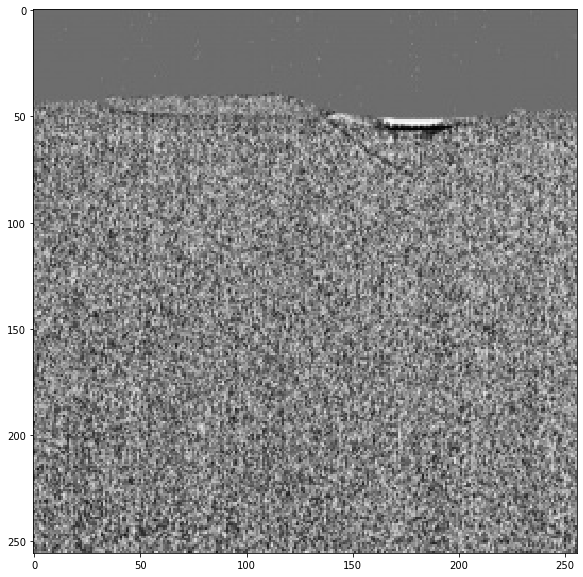

In [897]:
imshow(image)
print(len(image.shape))
isinstance(image,np.ndarray)

In [898]:
with torch.no_grad():
    input_image = torch.unsqueeze(img_to_tensor(img_transform(p=1)(image=image)['image']).cuda(), dim=0)

In [899]:
mask = model(input_image)

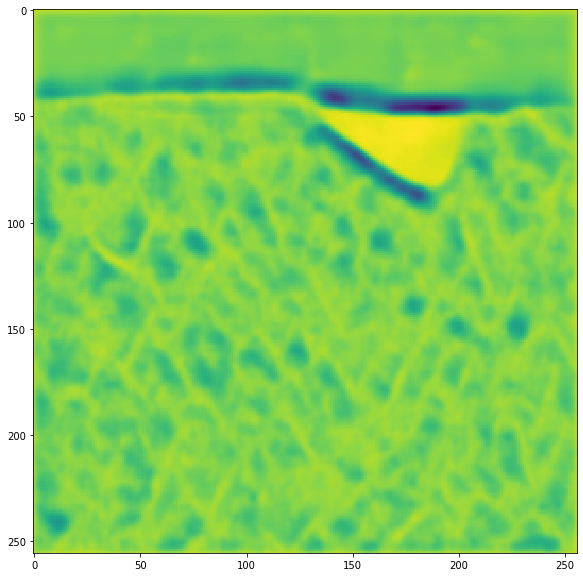

In [900]:
mask_array = mask.data[0].cpu().numpy()[0]
#print(mask.data[0].cpu().numpy())
#from PIL import Image
#img = Image.fromarray(mask_array, 'RGB')
import matplotlib.pyplot as plt
plt.imshow(mask_array)

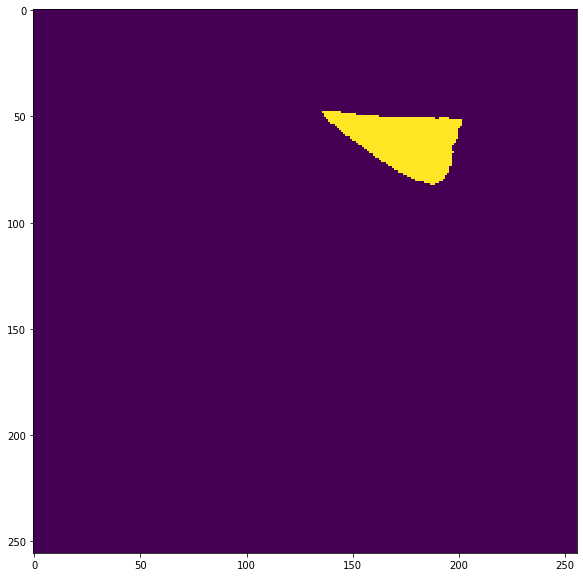

In [901]:
imshow((mask_array > 0.2).astype(np.uint8))
#imshow(mask_overlay(image, (mask_array > 0).astype(np.uint8)))

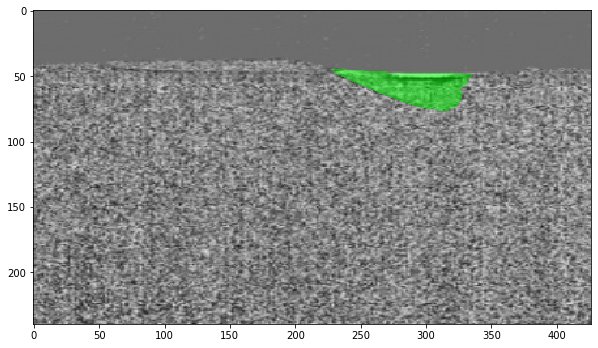

In [902]:
image = cv2.resize(image, (427,240))
mask_array = cv2.resize(mask_array, (427,240))


fig = plt.figure(figsize=(4.26, 2.4), dpi=100) # dpi & figsize of my choosing
fig.figimage(mask_overlay(image, (mask_array > 0).astype(np.uint8)))
#fig.figimage(mask_array)
#fig.text(X,Y,TEXT, size='medium', backgroundcolor='white', alpha=0.5)
plt.savefig('hi.png')
plt.close(fig)

imshow(mask_overlay(image, (mask_array > 10).astype(np.uint8)))


In [903]:
#from utils import Visualizations

In [904]:
#vis2=Visualizations()
#import visdom
#vis = visdom.Visdom()
#self.vis.images(images, nrow=ncols, win=self.display_id + 1,
#                                padding=2, opts=dict(title=title + ' images'))

In [905]:
#vis.plot_loss(np.mean(valid_losses), step)

In [906]:
import visdom
import numpy as np
vis = visdom.Visdom()
#vis.text('Hello, world!')
#mask_image=cv2.cvtColor(mask_array, cv2.COLOR_GRAY2RGB)
#vis.image(mask_array)
mask_array[mask_array<0]=0
vis.image(mask_array,   win='Perdictmask', opts={'title':"Training predicted mask"})

imgaa=cv2.imread('./data/cropped_train/instrument_dataset_2/binary_masks/00252.png')

imgaa=cv2.cvtColor(imgaa, cv2.COLOR_RGB2GRAY)
imgaa = cv2.resize(imgaa, (427,240))
vis.image(imgaa, win='GTmask', opts={'title':"Training Gt mask"})

Setting up a new session...


'GTmask'

In [907]:
import visdom
import numpy as np
vis = visdom.Visdom()
#vis.text('Hello, world!')
from PIL import Image 
img=cv2.imread('hi.png')

img0=np.zeros((3, 240, 426))
img0=[img[:,:,0],img[:,:,1],img[:,:,2]]
#vis.image(np.zeros((1, 100, 500)))
#img.reshape((3,240,426))
#print(img.shape)

vis.image(img0, win='overlaid', opts={'title':"Training overlaid predicted mask"})


Setting up a new session...


'overlaid'

Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection is already closed.
Connection

[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 1

[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 1

[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 1

[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 111] Connection refused
[Errno 1